In [3]:
# import requrired libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 

In [4]:
# to ignore warnings while running the code 
warnings.filterwarnings("ignore")

## Step-1 : Load the Data

In [6]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv') 
print("Shape:", df.shape)

print("Columns:", df.columns)

df.head()

Shape: (7043, 21)
Columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step-2 : Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [55]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916186
std,24.559481,30.090047,2265.270688
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.000000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [56]:
df.describe(include = 'object')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [32]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Note: We can observe that the data does not contains any misssing values.

In [54]:
duplicate = df[df.duplicated()]
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## Observation : The data does not contain any duplicates

In [8]:
# finding irregularities in the data
def irregularities(data):
    for i in data:
        print('*'*20, i, '*'*20)
        print(data[i].unique())
        print()

irregularities(df)

******************** customerID ********************
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

******************** gender ********************
['Female' 'Male']

******************** SeniorCitizen ********************
[0 1]

******************** Partner ********************
['Yes' 'No']

******************** Dependents ********************
['No' 'Yes']

******************** tenure ********************
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

******************** PhoneService ********************
['No' 'Yes']

******************** MultipleLines ********************
['No phone service' 'No' 'Yes']

******************** InternetService ********************
['DSL' 'Fiber optic' 'No']

******************** OnlineSecurity ********************
['No' 'Yes' 'No internet

## Observation - 1: there are no irregularities in the data

## Observation - 2: Changing the datatypes

   TotalCharges - float
   SeniorCitizen - object 


In [36]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [38]:
# Replace blank spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# Convert the column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# median imputing
df['TotalCharges'].fillna(1397, inplace=True)

# Check the result
print(df['TotalCharges'].head())

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64


## observation : Dataset is having missing values . but we cannot see them in df.info() due to wrong datatype and after typecasting we got see empty string . So we have to replace the empty string's with median Imputer

In [40]:
## recheck 
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Target variable ='Churn'

## Uni-Variet Analysis

<Axes: xlabel='Churn'>

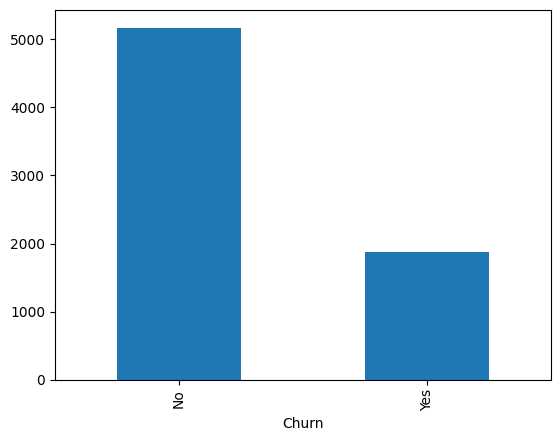

In [9]:
df['Churn'].value_counts().plot(kind='bar')

## Observation : It looks like the data is having imbalance YES class

## Univariate Non Visual statistical Analysis

In [15]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [17]:
discrete_df = df.select_dtypes(include=['object'])

In [18]:
discrete_univariate_analysis(discrete_df)

********** customerID **********
count                                                   7043
nunique                                                 7043
unique     [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
Name: customerID, dtype: object
Value Counts: 
 customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

********** gender **********
count                7043
nunique                 2
unique     [Female, Male]
Name: gender, dtype: object
Value Counts: 
 gender
Male      3555
Female    3488
Name: count, dtype: int64

********** Partner **********
count           7043
nunique            2
unique     [Yes, No]
Name: Partner, dtype: object
Value Counts: 
 Partner
No     3641
Yes    3402
Name: count, dtype: int64

********** Dependents **********
count           7043
nunique            2
unique     [No, Yes]


In [23]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'skew']))
        print()

In [24]:
numerical_df = df.select_dtypes(include = ['int','float'])

In [26]:
numerical_univariate_analysis(numerical_df)

********** SeniorCitizen **********
count     7043.000000
min          0.000000
max          1.000000
mean         0.162147
median       0.000000
std          0.368612
skew         1.833633
Name: SeniorCitizen, dtype: float64

********** tenure **********
count     7043.000000
min          0.000000
max         72.000000
mean        32.371149
median      29.000000
std         24.559481
skew         0.239540
Name: tenure, dtype: float64

********** MonthlyCharges **********
count     7043.000000
min         18.250000
max        118.750000
mean        64.761692
median      70.350000
std         30.090047
skew        -0.220524
Name: MonthlyCharges, dtype: float64



## Bi-Variet Analysis - Non Visual Statistical Analysis

In [42]:
numerical_df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


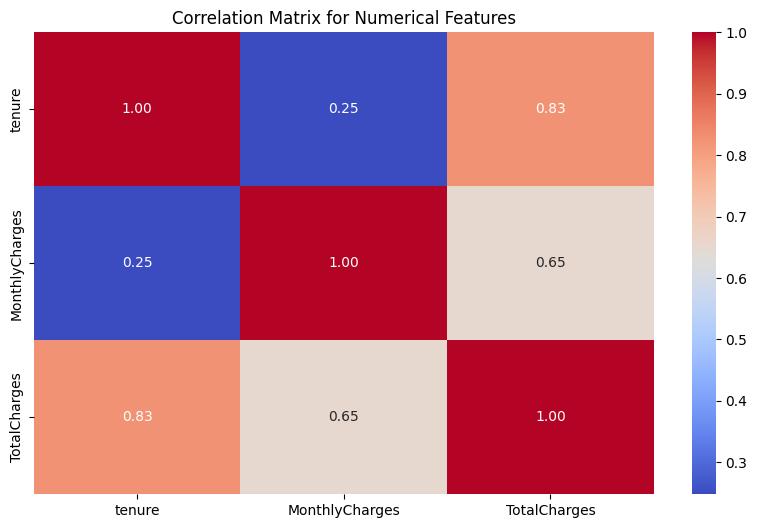

In [43]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

## Bi-Variet Analysis - Visual Analysis

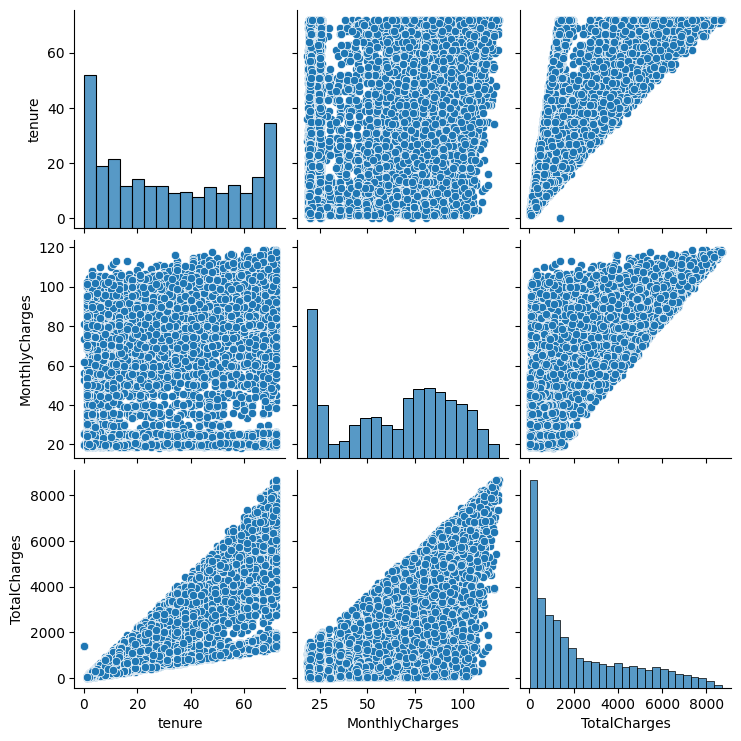

In [45]:
sns.pairplot(df)

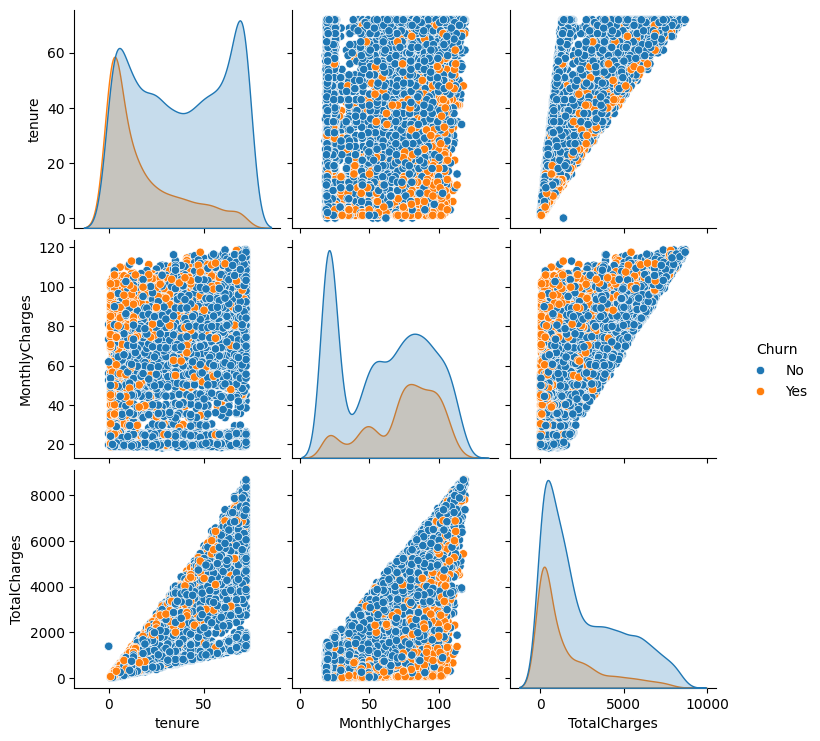

In [46]:
sns.pairplot(df,hue='Churn')

## Outlier detection 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: xlabel='tenure'>

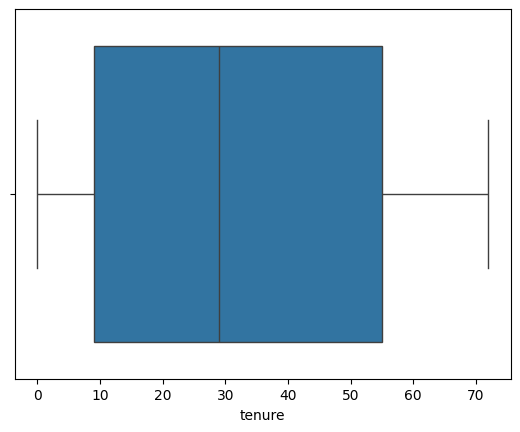

In [48]:
sns.boxplot(data = df,x='tenure')

<Axes: xlabel='MonthlyCharges'>

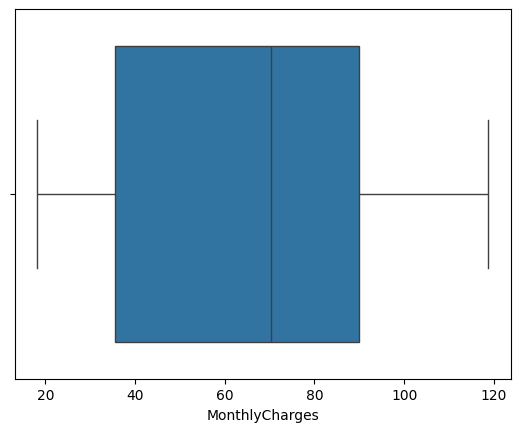

In [49]:
sns.boxplot(data = df, x = 'MonthlyCharges')


<Axes: xlabel='TotalCharges'>

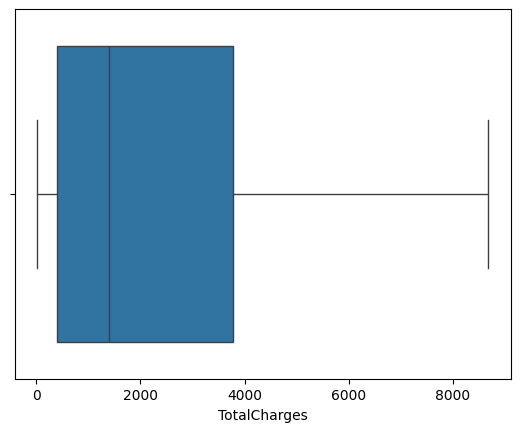

In [50]:
sns.boxplot(data = df , x = 'TotalCharges')

## Observation : There are no outliers in the data 